# EDA on Global Terrorism

## Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## Loading and Understanding the Data

In [2]:
data = pd.read_csv('data/globalterrorismdb.csv',encoding = 'ISO-8859-1',low_memory =False)

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [5]:
data.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [6]:
data.shape

(181691, 135)

In [7]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [8]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [9]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


## Data Preprocessing

In [10]:
data.rename(columns= {'iyear':'Year','imonth':'Month','country_txt':'Country',
                   'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target1',
                   'nkill':'Killed','nwound':'wounded','summary':'Summary','gname':'Group',
                   'targetype1_txt':'Target_type','weaptye1_txt':'Weapon_type','motive':'Motive'},inplace=True)


In [11]:
data.head()

,eventid,Year,Month,iday,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [12]:
data.columns

Index(['eventid', 'Year', 'Month', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'Country', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [13]:
data['Motive']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
181686    NaN
181687    NaN
181688    NaN
181689    NaN
181690    NaN
Name: Motive, Length: 181691, dtype: object

In [14]:
df=data

# Exploratory Data Analysis

## Number of Terrorist Attacks each Year

In [15]:
attacks_per_year = df['Year'].value_counts().sort_index()

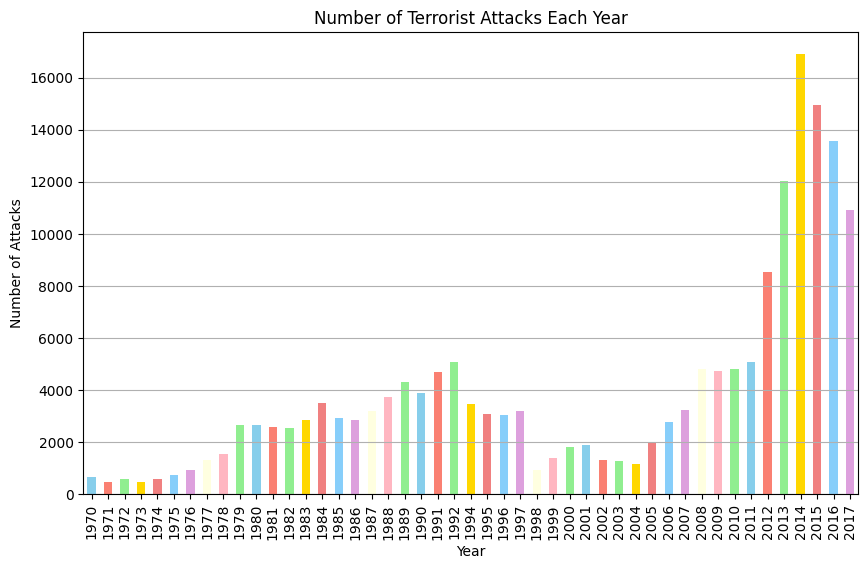

In [16]:
plt.figure(figsize=(10, 6)) 
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'lightcoral', 'lightskyblue', 'plum', 'lightyellow', 'lightpink', 'lightgreen']
attacks_per_year.plot(kind='bar', color=colors)
plt.title('Number of Terrorist Attacks Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(axis='y')
plt.show()

In [17]:
numerical_columns = ['Year', 'Month', 'iday']  

numerical_summary = df[numerical_columns].describe()
print(numerical_summary)


                Year          Month           iday
count  181691.000000  181691.000000  181691.000000
mean     2002.638997       6.467277      15.505644
std        13.259430       3.388303       8.814045
min      1970.000000       0.000000       0.000000
25%      1991.000000       4.000000       8.000000
50%      2009.000000       6.000000      15.000000
75%      2014.000000       9.000000      23.000000
max      2017.000000      12.000000      31.000000


## Distribution of Attack Types

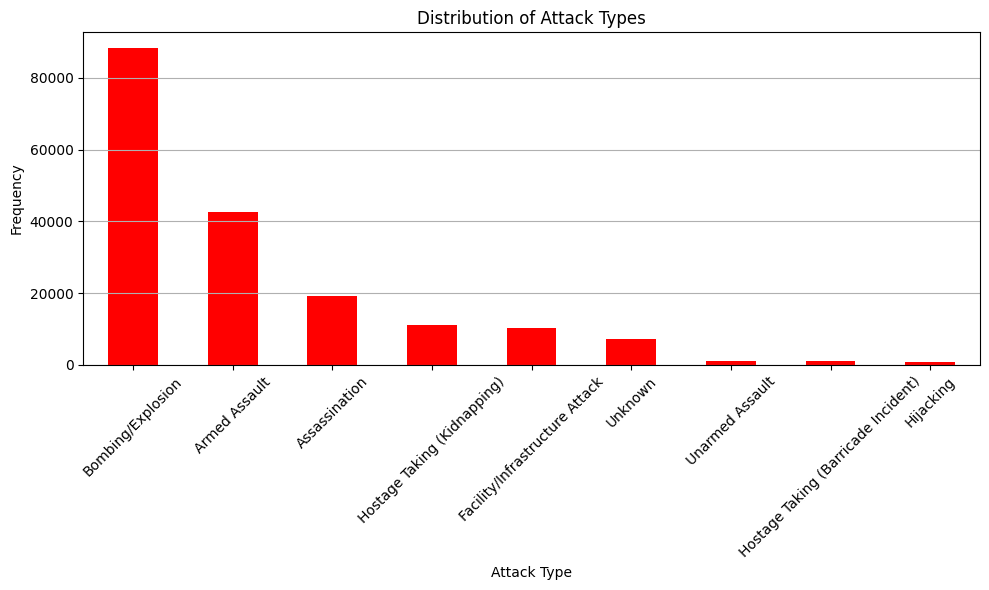

In [18]:
attack_type_counts = df['AttackType'].value_counts()

plt.figure(figsize=(10, 6))
attack_type_counts.plot(kind='bar', color='red')
plt.title('Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [19]:
print("Attack Types and Frequencies:")
print(attack_type_counts)

Attack Types and Frequencies:
AttackType
Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: count, dtype: int64


## Number of Terrorist Attacks by Country

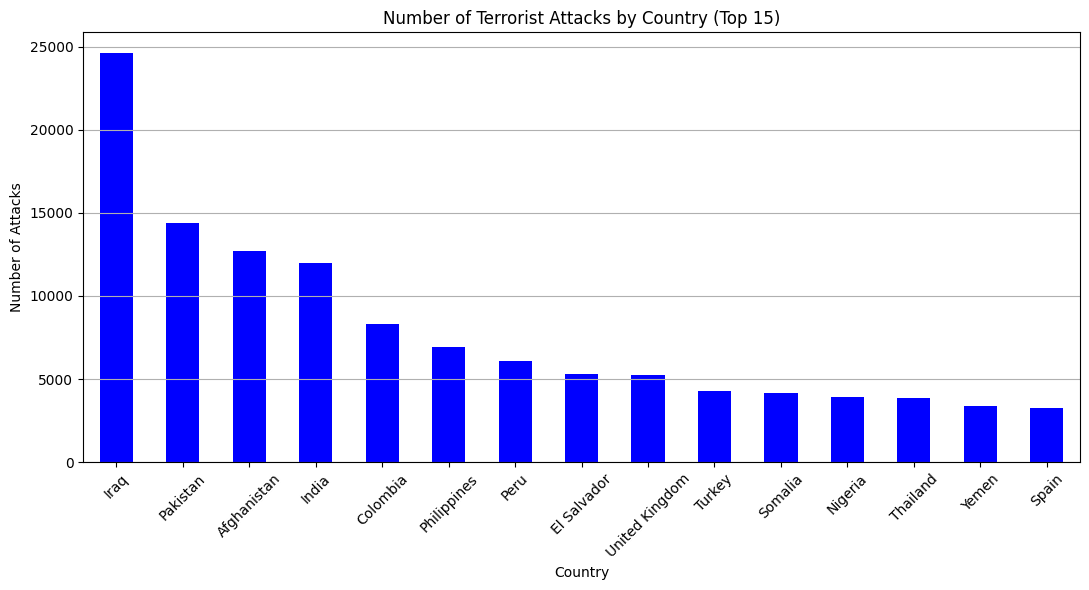

In [20]:
country_attacks = df['Country'].value_counts()

plt.figure(figsize=(11, 6))
country_attacks.head(15).plot(kind='bar', color='blue')  
plt.title('Number of Terrorist Attacks by Country (Top 15)')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [21]:
print("Country-wise Attacks (Top 15):")
print(country_attacks.head(15))

Country-wise Attacks (Top 15):
Country
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: count, dtype: int64


### Word Cloud (Countries Involved)

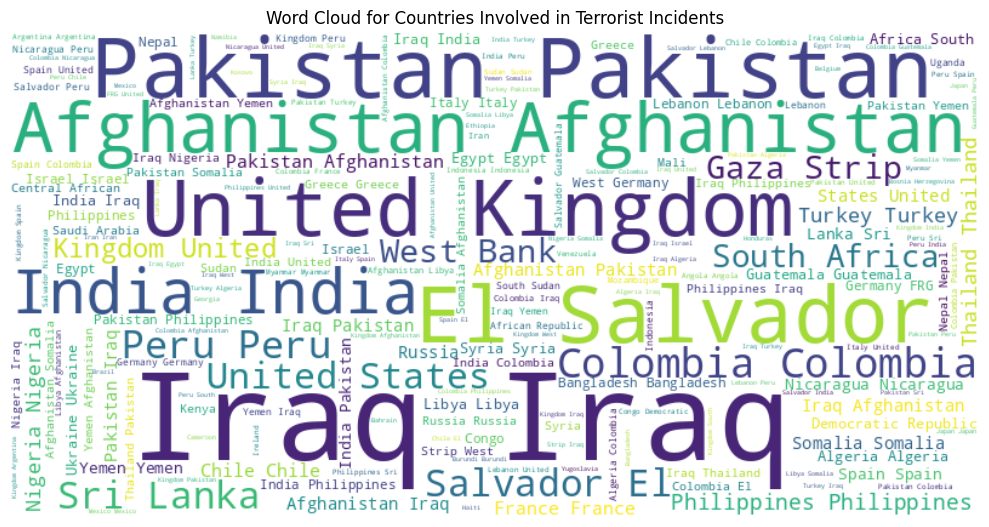

In [22]:
countries_involved = df['Country'].dropna()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(countries_involved))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Countries Involved in Terrorist Incidents')
plt.axis('off')
plt.tight_layout()
plt.show()

## Target Types

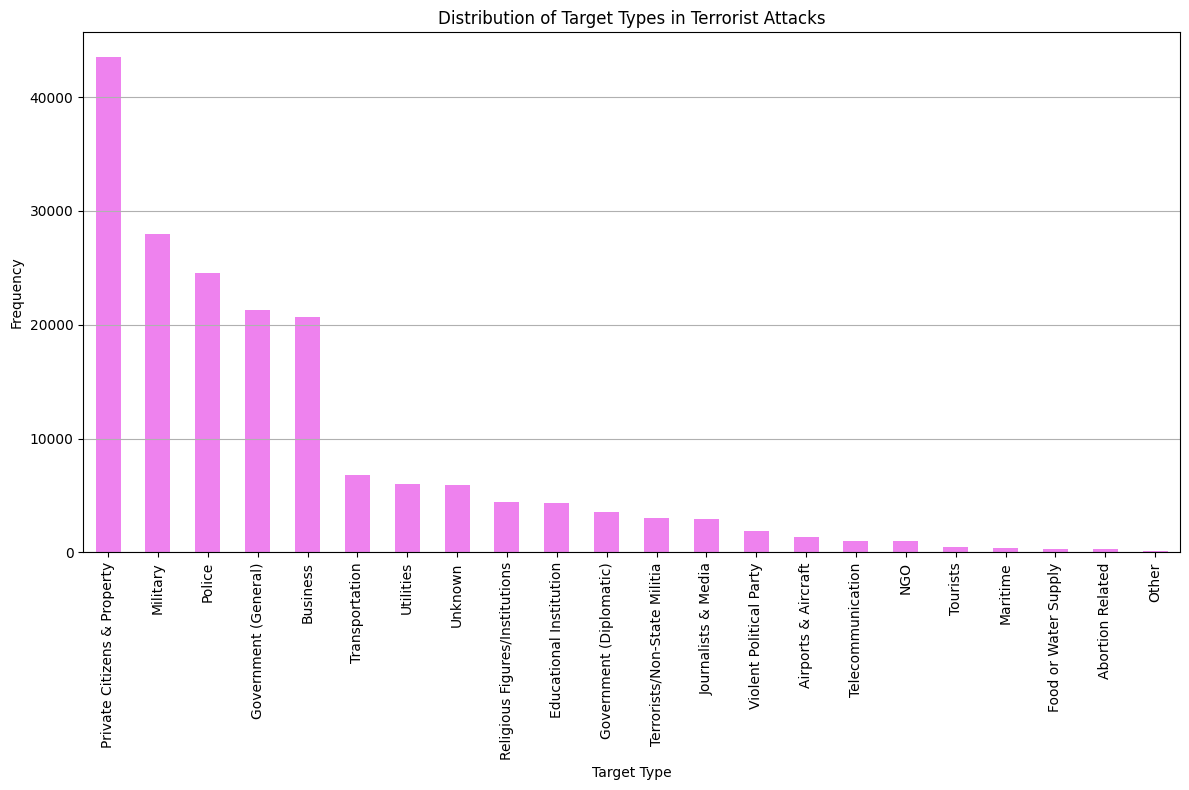

In [23]:
target_type_counts = df['targtype1_txt'].value_counts()

plt.figure(figsize=(12, 8))
target_type_counts.plot(kind='bar', color='violet')
plt.title('Distribution of Target Types in Terrorist Attacks')
plt.xlabel('Target Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [24]:
print("Target Types and Frequencies:")
print(target_type_counts)

Target Types and Frequencies:
targtype1_txt
Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: count, dtype: int64


### Word Cloud (Target Types)

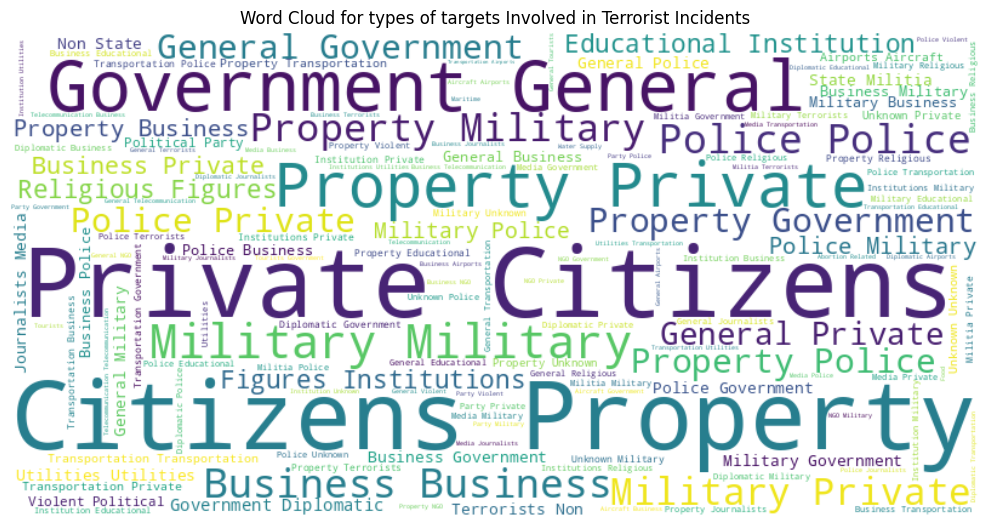

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

target_type = df['targtype1_txt'].dropna()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(target_type))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for types of targets Involved in Terrorist Incidents')
plt.axis('off')
plt.tight_layout()
plt.show()


## Comparison: People Wounded vs. People Killed (Yearly basis)

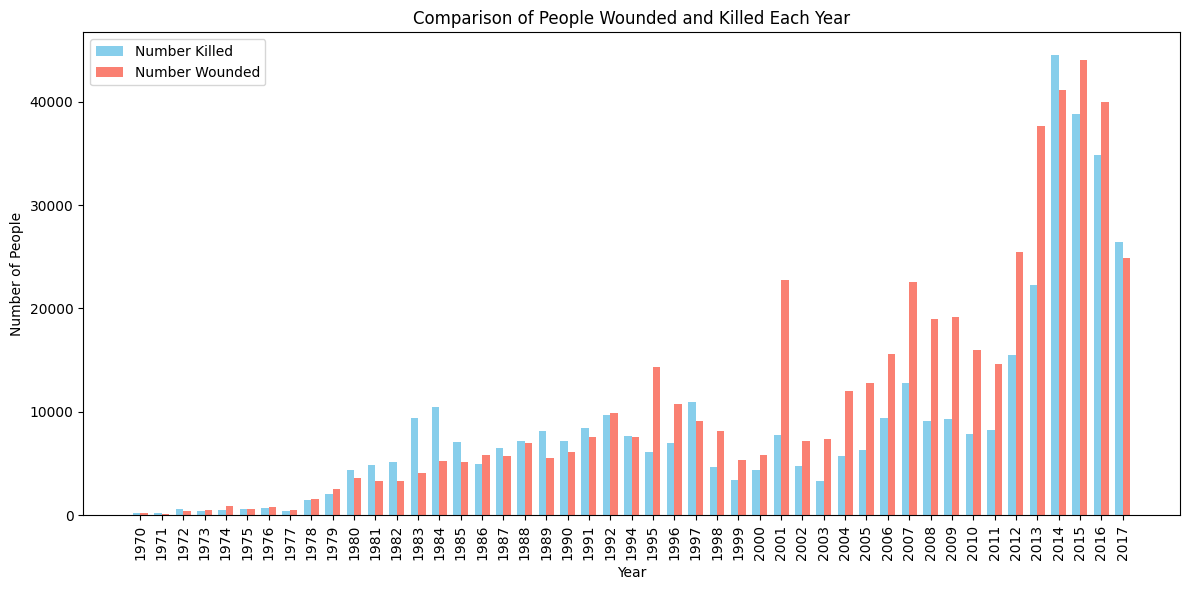

In [26]:
yearly_casualties = df.groupby('Year')[['Killed', 'wounded']].sum()

plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(yearly_casualties))

plt.bar(index, yearly_casualties['Killed'], bar_width, label='Number Killed', color='skyblue')
plt.bar(index + bar_width, yearly_casualties['wounded'], bar_width, label='Number Wounded', color='salmon')

plt.xlabel('Year')
plt.ylabel('Number of People')
plt.title('Comparison of People Wounded and Killed Each Year')
plt.xticks(index + bar_width / 2, yearly_casualties.index, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


## Comparison: People Wounded vs. People Killed (Country Basis)

<Figure size 1200x800 with 0 Axes>

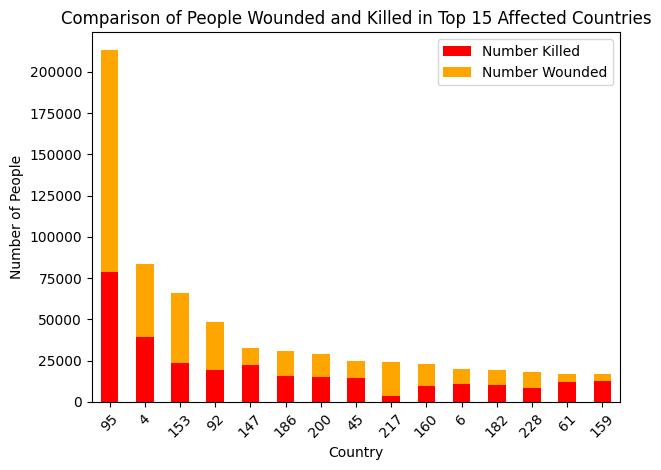

In [27]:
country_casualties = df.groupby('country')[['Killed', 'wounded']].sum()

country_casualties['total_casualties'] = country_casualties['Killed'] + country_casualties['wounded']
country_casualties = country_casualties.sort_values(by='total_casualties', ascending=False).head(15)

plt.figure(figsize=(12, 8))
country_casualties[['Killed', 'wounded']].plot(kind='bar', stacked=True, color=['red', 'orange'])
plt.title('Comparison of People Wounded and Killed in Top 15 Affected Countries')
plt.xlabel('Country')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.legend(['Number Killed', 'Number Wounded'])
plt.tight_layout()
plt.show()


## Number of People Wounded in Top Cities

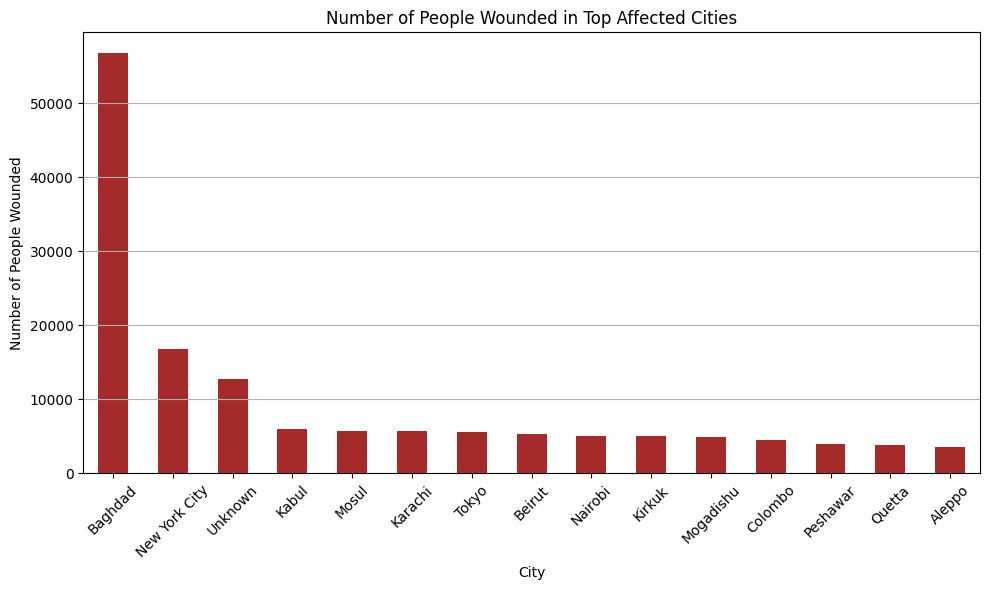

In [28]:
city_wounded = df.groupby('city')['wounded'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
city_wounded.head(15).plot(kind='bar', color='brown')
plt.title('Number of People Wounded in Top Affected Cities')
plt.xlabel('City')
plt.ylabel('Number of People Wounded')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [29]:
print("Top Cities by Number of People Wounded:")
print(city_wounded.head(15))

Top Cities by Number of People Wounded:
city
Baghdad          56725.0
New York City    16781.0
Unknown          12803.0
Kabul             5973.0
Mosul             5787.0
Karachi           5688.0
Tokyo             5542.0
Beirut            5341.0
Nairobi           5024.0
Kirkuk            5008.0
Mogadishu         4955.0
Colombo           4520.0
Peshawar          3938.0
Quetta            3842.0
Aleppo            3623.0
Name: wounded, dtype: float64


## Top Terrorist Groups by Destruction

In [30]:
group_destruction = df.groupby('Group')[['Killed', 'property']].sum()
group_destruction = group_destruction.sort_values(by='Killed', ascending=False)

print("Top Terrorist Groups by Destruction:")
print(group_destruction.head(10))


Top Terrorist Groups by Destruction:
                                                    Killed  property
Group                                                               
Unknown                                           112367.0    -64886
Islamic State of Iraq and the Levant (ISIL)        38923.0     -9787
Taliban                                            29410.0     -8082
Boko Haram                                         20328.0     -2069
Shining Path (SL)                                  11601.0      3433
Liberation Tigers of Tamil Eelam (LTTE)            10989.0      -543
Al-Shabaab                                          9330.0     -6751
Farabundo Marti National Liberation Front (FMLN)    8065.0      3190
Nicaraguan Democratic Force (FDN)                   6662.0       881
Tehrik-i-Taliban Pakistan (TTP)                     6042.0      -851


## Top Terrorist Groups (Number of Attacks)

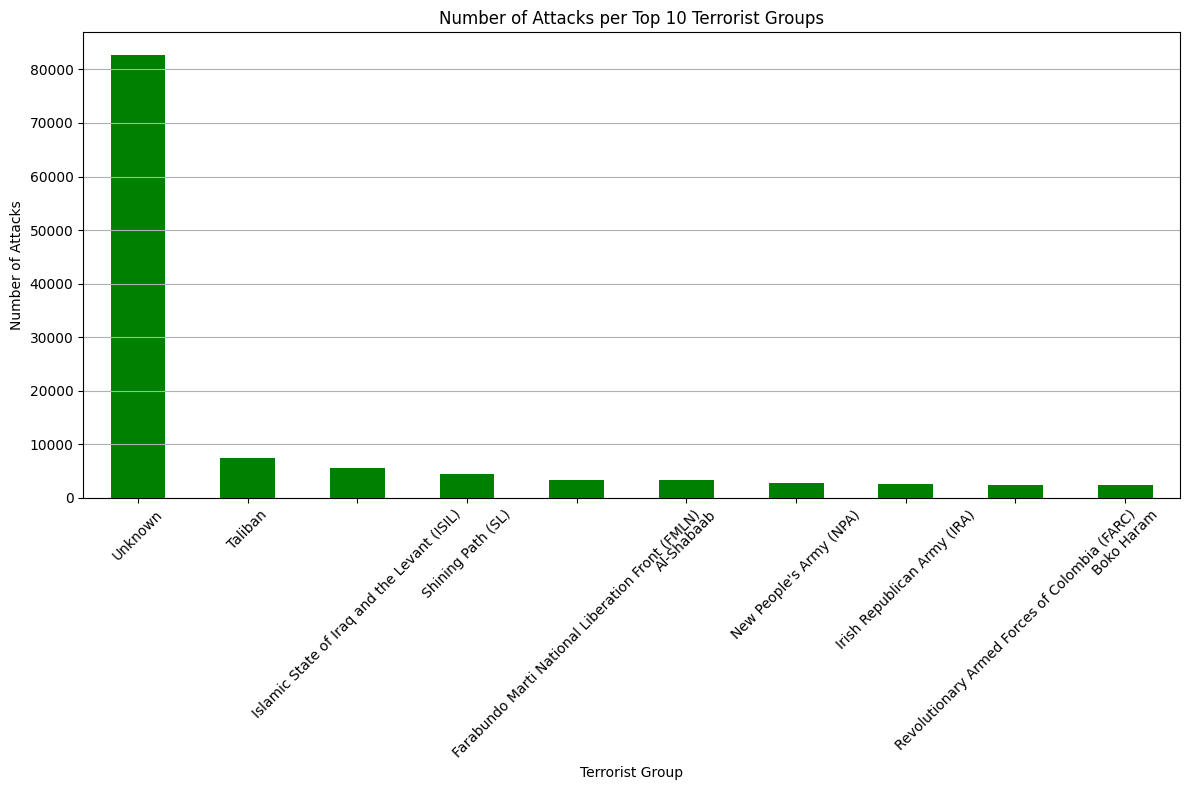

In [31]:
group_attacks = df['Group'].value_counts().head(10)

plt.figure(figsize=(12, 8))
group_attacks.plot(kind='bar', color='Green')
plt.title('Number of Attacks per Top 10 Terrorist Groups')
plt.xlabel('Terrorist Group')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Comparison: People Killed vs. People Wounded (Target Attack Type)

<Figure size 1200x800 with 0 Axes>

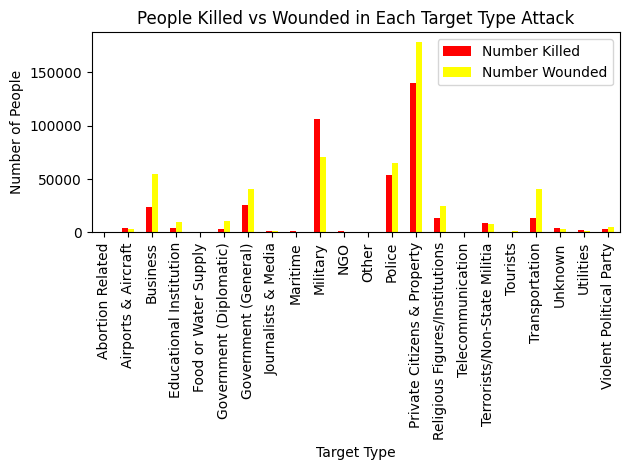

In [32]:
target_type_stats = df.groupby('targtype1_txt')[['Killed', 'wounded']].sum()

plt.figure(figsize=(12, 8))
target_type_stats.plot(kind='bar', color=['Red', 'yellow'])
plt.title('People Killed vs Wounded in Each Target Type Attack')
plt.xlabel('Target Type')
plt.ylabel('Number of People')
plt.xticks(rotation=90)
plt.legend(['Number Killed', 'Number Wounded'])
plt.tight_layout()
plt.show()

## Number of People killed in Each Attack Type

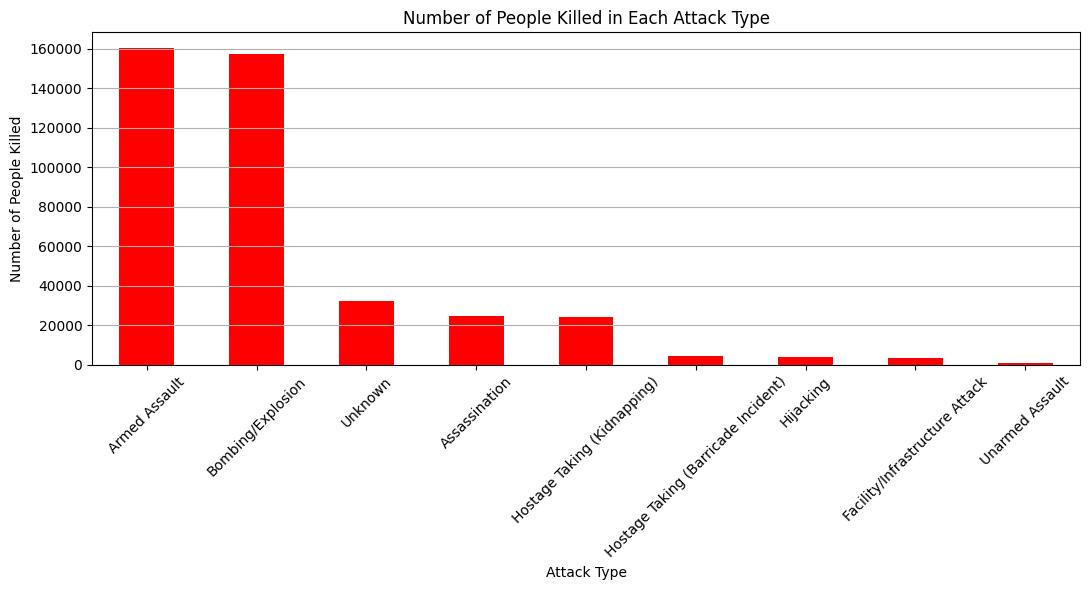

In [33]:
attack_type_killed = df.groupby('AttackType')['Killed'].sum().sort_values(ascending=False)

plt.figure(figsize=(11, 6))
attack_type_killed.plot(kind='bar', color='red')
plt.title('Number of People Killed in Each Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Number of People Killed')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [34]:
attacktype_killed=df[["AttackType","Killed"]].groupby("AttackType").sum().sort_values(by="Killed",ascending=False)
attacktype_killed

,Killed
AttackType,
Armed Assault,160297.0
Bombing/Explosion,157321.0
Unknown,32381.0
Assassination,24920.0
Hostage Taking (Kidnapping),24231.0
Hostage Taking (Barricade Incident),4478.0
Hijacking,3718.0
Facility/Infrastructure Attack,3642.0
Unarmed Assault,880.0


## Total People Killed vs. People Wounded

In [35]:
total_people_killed = df['Killed'].sum()
total_people_wounded = df['wounded'].sum()

print(f"Total number of people killed: {total_people_killed}")
print(f"Total number of people wounded: {total_people_wounded}")

Total number of people killed: 411868.0
Total number of people wounded: 523869.0


## Top 5 Most common Target Types:

In [36]:
top_target_types = df['targtype1_txt'].value_counts().head(5)
print("\nTop 5 Most Common Target Types:")
print(top_target_types)


Top 5 Most Common Target Types:
targtype1_txt
Private Citizens & Property    43511
Military                       27984
Police                         24506
Government (General)           21283
Business                       20669
Name: count, dtype: int64


## Top 5 Most Common Attack Types:

In [37]:
top_attack_types = df['AttackType'].value_counts().head(5)
print("\nTop 5 Most Common Attack Types:")
print(top_attack_types)



Top 5 Most Common Attack Types:
AttackType
Bombing/Explosion                 88255
Armed Assault                     42669
Assassination                     19312
Hostage Taking (Kidnapping)       11158
Facility/Infrastructure Attack    10356
Name: count, dtype: int64


## Number of Incidents per Year

In [38]:
incidents_per_year = df['Year'].value_counts().sort_index()
print("\nNumber of Incidents per Year:")
print(incidents_per_year)


Number of Incidents per Year:
Year
1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: count, dtype: int64


## Top 5 Most Affected Countries

In [39]:
top_countries = df['Country'].value_counts().head(5)
print("\nTop 5 Affected Countries:")
print(top_countries)


Top 5 Affected Countries:
Country
Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: count, dtype: int64


## Trend of Terrorist Attacks over Time

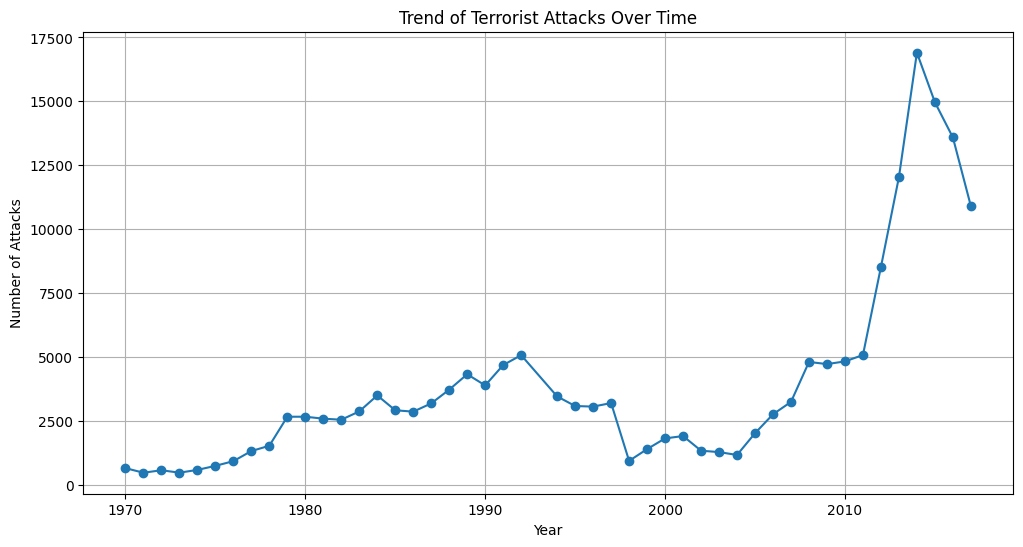

In [40]:
plt.figure(figsize=(12, 6))
attacks_over_time = df['Year'].value_counts().sort_index()
plt.plot(attacks_over_time.index, attacks_over_time.values, marker='o', linestyle='-')
plt.title('Trend of Terrorist Attacks Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.show()

# *From the comprehensive Exploratory Data Analysis (EDA) conducted, several key insights can be derived:*

**Total Casualties:** The total number of people killed and wounded due to terrorist incidents.

Killed:411868

Wounded:523869

Total Casualties=935737

**Incidents per Year:** Understanding the trend and frequency of terrorist incidents over different years.

**Top Affected Countries:** Identifying the top countries most affected by terrorist activities.
1. Iraq
2. Pakistan
3. Afghanistan
4. India
5. Colombia